In [10]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


In [3]:
engine = create_engine(cnxn_string.format(
    username="postgres", 
    pswd="1", 
    host="localhost", 
    port=5432,
    database="sqlda"))  

In [4]:
bat = pd.read_sql_table('bat_sales_vol', engine)

In [6]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sales_transaction_date  964 non-null    datetime64[ns]
 1   count                   964 non-null    int64         
 2   sum                     964 non-null    float64       
 3   lag                     957 non-null    float64       
 4   volume                  957 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 37.8 KB


In [7]:
bat_ltd = pd.read_sql_table('bat_ltd_sales_vol', engine)

In [8]:
bat_ltd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sales_transaction_date  836 non-null    datetime64[ns]
 1   count                   836 non-null    int64         
 2   sum                     836 non-null    float64       
 3   lag                     829 non-null    float64       
 4   volume                  829 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 32.8 KB


In [9]:
bat_ltd['volume']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
831    0.008574
832    0.009259
833    0.009245
834    0.010281
835    0.009569
Name: volume, Length: 836, dtype: float64

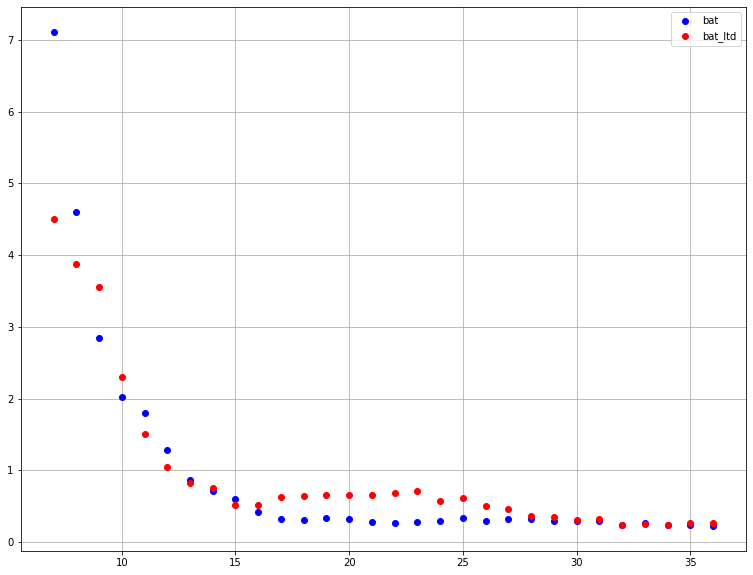

In [15]:
# Создаем линейный график

plt.figure(figsize = (13,10))
# Рисуется два графика:
# 1. Отображаются только точки: параметр 'bo'
# 2. Отображается линия: параметр 'k'
plt.plot(bat['volume'].dropna().iloc[0:30],'bo')
plt.plot(bat_ltd['volume'].dropna().iloc[0:30],'ro')
plt.legend(['bat','bat_ltd'])
# plt.title('Количество новых клиентов по месяцам')
# plt.xlabel('Месяц')
# plt.ylabel('Кол-во клиентов')
plt.grid(True)

plt.show()